<a href="https://colab.research.google.com/github/swopnimghimire-123123/DSA-in-Python/blob/main/19_Selection_Sort.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Selection Sort — In Depth

## 1. Overview
**Selection Sort** repeatedly selects the minimum (or maximum) element from the unsorted portion and swaps it into the next position of the sorted portion.  
It is an **in-place comparison sort** and is conceptually simple.

- Sorting order shown here: ascending (smallest first).
- Not stable by default (swapping can change relative order of equal elements).
- Time complexity is quadratic: `O(n^2)` for best, average, and worst.
- Space complexity is `O(1)` (in-place).

---

## 2. Idea / Algorithm
For `i` from `0` to `n-2`:
1. Find index `min_idx` of smallest element in `arr[i..n-1]`.
2. Swap `arr[i]` and `arr[min_idx]` (if different).
After iteration `i`, the subarray `arr[0..i]` contains the smallest `i+1` elements in sorted order.

---

## 3. Pseudocode
for i in 0 to n-2:

min_idx = i

for j in i+1 to n-1:

if arr[j] < arr[min_idx]:

min_idx = j

swap arr[i] and arr[min_idx]


---

## 4. Dry Run (example)
Input: `[64, 25, 12, 22, 11]`

- i=0: find min in [64,25,12,22,11] -> min is 11 at idx=4 -> swap arr[0]<->arr[4]
  -> `[11,25,12,22,64]`
- i=1: find min in [25,12,22,64] -> 12 at idx=2 -> swap arr[1]<->arr[2]
  -> `[11,12,25,22,64]`
- i=2: find min in [25,22,64] -> 22 at idx=3 -> swap
  -> `[11,12,22,25,64]`
- i=3: find min in [25,64] -> 25 at idx=3 -> swap (no-op)
  -> `[11,12,22,25,64]`
Done.

---

## 5. Complexity Analysis

| Metric | Count (exact / typical) | Asymptotic |
|--------|--------------------------|------------|
| Comparisons | `n(n-1)/2` ≈ `n^2/2` | O(n²) |
| Swaps | ≤ `n-1` (one per outer loop) | O(n) |
| Time | — | O(n²) (best, avg, worst) |
| Space | extra variables only | O(1) (in-place) |

Notes:
- Number of comparisons does not depend on input order (not adaptive).
- Selection sort minimizes swaps (useful when swaps are expensive: e.g., external memory, write-heavy scenarios).

---

## 6. Stability
- Default selection sort (swap `arr[i]` with `arr[min_idx]`) is **not stable**:
  - If two equal keys exist, swapping may reorder them.
- You can make a **stable selection sort** by removing the minimum element and inserting it at position `i` (shifting elements right). That keeps equal items in original order. Still `O(n^2)` time.

---

## 7. When to use selection sort
- Educational purposes / teaching sorting basics.
- Tiny arrays (e.g., `n` small).
- When swap cost is high and comparisons are cheap (selection sort does minimal swaps).
- When you only need the k smallest items: you can run selection for `k` iterations (O(n·k)).

When not to use:
- Large arrays — use `Timsort` (Python `sorted()`), quicksort, mergesort, or heapsort.

---

## 8. Variants & Practical Notes
- **Partial selection**: stop after `k` iterations to get the `k` smallest elements (order not necessarily sorted among those found unless you finish).
- **Selection for kth smallest**: selection algorithm (Quickselect) is better (average O(n)).
- **Stable selection**: shifting approach — stable but increases writes.

---

## 9. Correctness (loop invariant)
Invariant before iteration `i`: `arr[0..i-1]` contains the `i` smallest elements in sorted order.  
- Initialization: `i=0` implies empty sorted prefix, trivially true.  
- Maintenance: selecting smallest from `arr[i..n-1]` and swapping into `arr[i]` extends sorted prefix with the next smallest.  
- Termination: after `i = n-1` the whole array sorted.

---

## 10. Edge Cases
- Empty array `[]` and single-element arrays — function should handle gracefully.
- All equal elements — selection sort still performs all comparisons.
- Non-comparable elements (mixed types) will raise errors in Python — ensure elements are comparable.

---

## 11. Summary (short)
- Simple, in-place, non-stable by default.
- `O(n^2)` time, `O(1)` space.
- Minimal swaps (≤ n-1) — good when writes are expensive.


In [ ]:
# Basic selection sort (Ascending, inplace)

def selection_sort(arr):
  """In_place, ascending sort."""
  n = len(arr)
  for i in range(n-1):
    min_idx = i
    for j in range(i+1, n):
      if arr[j] < arr[min_idx]:
        min_idx = j

    # Swap
    arr[i], arr[min_idx] = arr[min_idx], arr[i]

# Quick test
arr = [64, 25, 12, 22, 11]
print(arr)
selection_sort(arr)
print(arr)

[64, 25, 12, 22, 11]
[11, 12, 22, 25, 64]


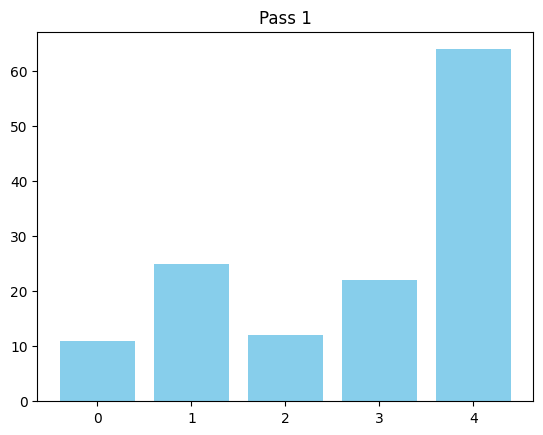

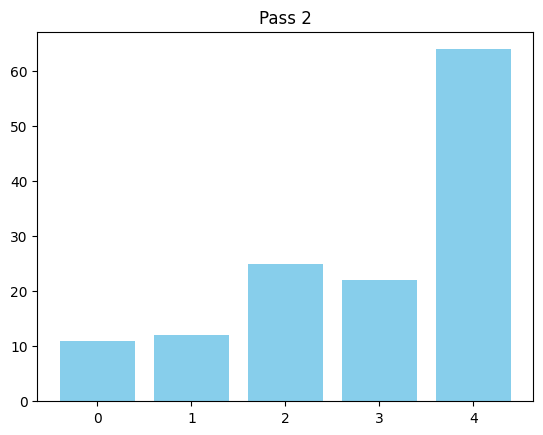

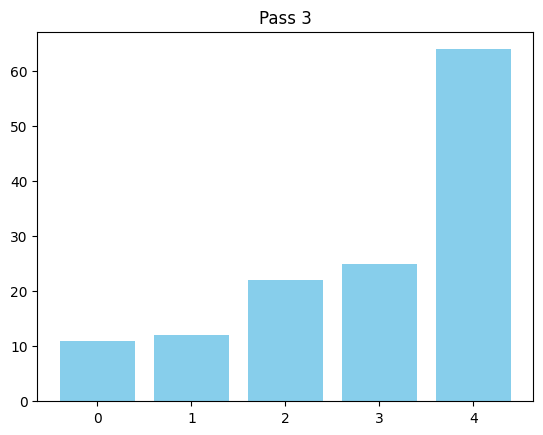

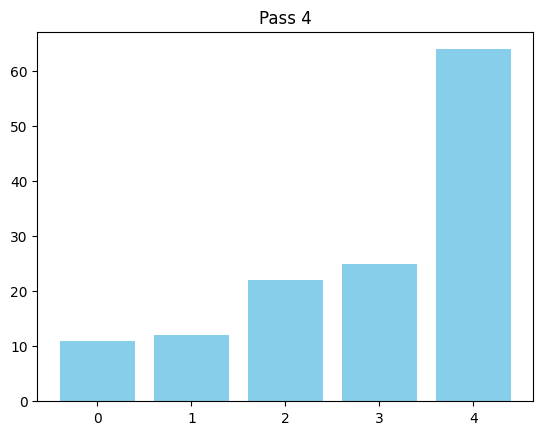

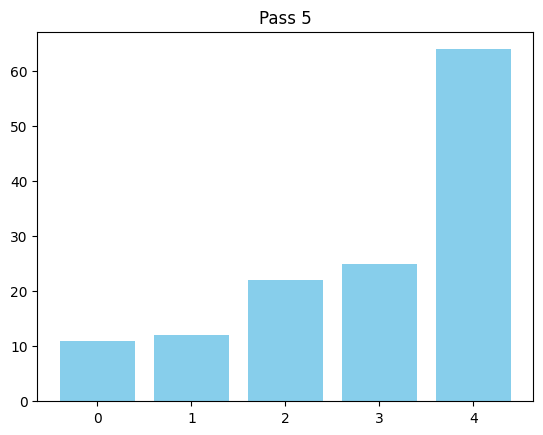

In [ ]:
import matplotlib.pyplot as plt
import time

def visualize_selection_sort(arr):
    n = len(arr)
    for i in range(n):
        min_index = i
        for j in range(i+1, n):
            if arr[j] < arr[min_index]:
                min_index = j
        arr[i], arr[min_index] = arr[min_index], arr[i]

        # Visualization
        plt.bar(range(len(arr)), arr, color='skyblue')
        plt.title(f"Pass {i+1}")
        plt.show()
        time.sleep(0.5)  # pause for clarity

nums = [64, 25, 12, 22, 11]
visualize_selection_sort(nums.copy())
